In [1]:

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

In [2]:
train_data_path = "New plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/"
validation_data_path = "New plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"


In [3]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [4]:

training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)


training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')  

Found 70295 images belonging to 38 classes.


In [5]:
training_data.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [6]:

valid_datagen = ImageDataGenerator(rescale=1./255)


valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 17572 images belonging to 38 classes.


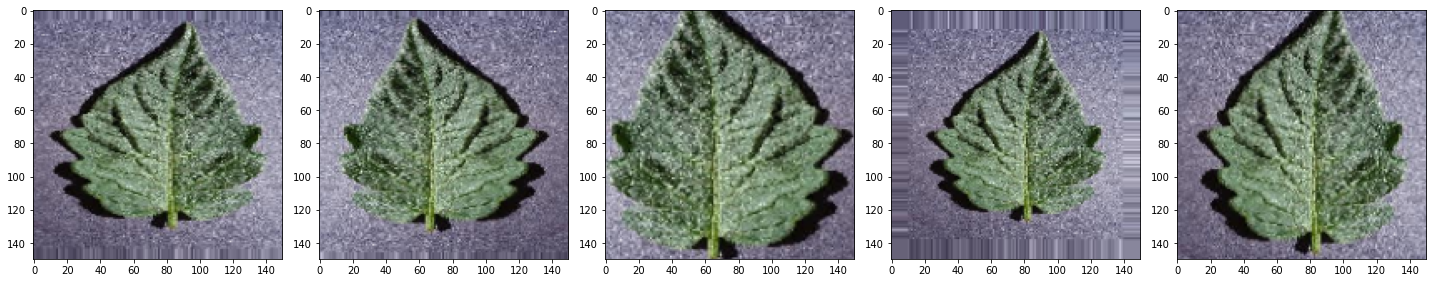

In [7]:

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [8]:

model_path = 'model/v6_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [9]:


cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=38, activation='softmax') # output layer
])



cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [11]:

history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 

Epoch 1/50
2197/2197 [==============================] - 3343s 2s/step - loss: 2.6234 - accuracy: 0.2780 - val_loss: 1.5426 - val_accuracy: 0.5619

Epoch 00001: val_accuracy improved from -inf to 0.56192, saving model to model\v6_pred_cott_dis.h5
Epoch 2/50
2197/2197 [==============================] - 2477s 1s/step - loss: 1.2149 - accuracy: 0.6337 - val_loss: 1.1230 - val_accuracy: 0.6813

Epoch 00002: val_accuracy improved from 0.56192 to 0.68125, saving model to model\v6_pred_cott_dis.h5
Epoch 3/50
2197/2197 [==============================] - 2189s 996ms/step - loss: 0.8881 - accuracy: 0.7286 - val_loss: 0.7903 - val_accuracy: 0.7623

Epoch 00003: val_accuracy improved from 0.68125 to 0.76229, saving model to model\v6_pred_cott_dis.h5
Epoch 4/50
2197/2197 [==============================] - 1828s 832ms/step - loss: 0.6953 - accuracy: 0.7840 - val_loss: 0.6781 - val_accuracy: 0.7954

Epoch 00004: val_accuracy improved from 0.76229 to 0.79536, saving model to model\v6_pred_cott_dis.h5
E


Epoch 00036: val_accuracy improved from 0.96016 to 0.96944, saving model to model\v6_pred_cott_dis.h5
Epoch 37/50
2197/2197 [==============================] - 1863s 848ms/step - loss: 0.0984 - accuracy: 0.9675 - val_loss: 0.1005 - val_accuracy: 0.9655

Epoch 00037: val_accuracy did not improve from 0.96944
Epoch 38/50
2197/2197 [==============================] - 1865s 849ms/step - loss: 0.0932 - accuracy: 0.9673 - val_loss: 0.0787 - val_accuracy: 0.9740

Epoch 00038: val_accuracy improved from 0.96944 to 0.97405, saving model to model\v6_pred_cott_dis.h5
Epoch 39/50
2197/2197 [==============================] - 1873s 853ms/step - loss: 0.0961 - accuracy: 0.9671 - val_loss: 0.1370 - val_accuracy: 0.9574

Epoch 00039: val_accuracy did not improve from 0.97405
Epoch 40/50
2197/2197 [==============================] - 1877s 854ms/step - loss: 0.0892 - accuracy: 0.9699 - val_loss: 0.1005 - val_accuracy: 0.9682

Epoch 00040: val_accuracy did not improve from 0.97405
Epoch 41/50
2197/2197 [===

In [12]:
model_path2 = 'model/v6_pred_cott_dis.h5'
cnn_model.save(model_path2)

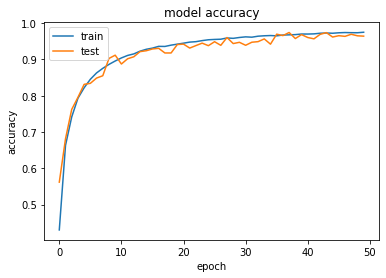

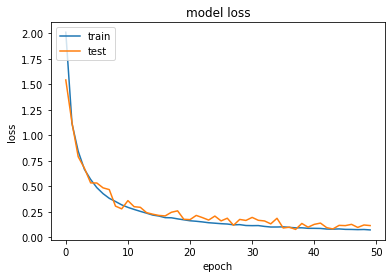

In [13]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
history.history

{'loss': [2.0099635124206543,
  1.1152303218841553,
  0.8438917398452759,
  0.6670493483543396,
  0.5681573748588562,
  0.4876728355884552,
  0.4289160668849945,
  0.38323724269866943,
  0.351990669965744,
  0.319230854511261,
  0.2946757376194,
  0.2742749750614166,
  0.2555074393749237,
  0.2378462851047516,
  0.21910127997398376,
  0.20951907336711884,
  0.19393686950206757,
  0.19258341193199158,
  0.18194833397865295,
  0.17274673283100128,
  0.16340965032577515,
  0.15844093263149261,
  0.15202589333057404,
  0.14413201808929443,
  0.1396084427833557,
  0.1347639262676239,
  0.13148903846740723,
  0.12356828153133392,
  0.12553203105926514,
  0.11691159754991531,
  0.11555719375610352,
  0.11628589034080505,
  0.10794534534215927,
  0.10210103541612625,
  0.10234875977039337,
  0.10376840829849243,
  0.09854922443628311,
  0.0940600112080574,
  0.09440381079912186,
  0.08943381905555725,
  0.08917441964149475,
  0.08812317252159119,
  0.08239785581827164,
  0.08123185485601425,
 